In [3]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [15]:
def gaussian_rbf(x, z, theta):
    return np.exp(-np.square(x-z.T)/theta)

In [16]:
def RMSE(yReal, yPredicted):
    return np.sqrt(np.average((yReal-yPredicted)**2))

In [17]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('mauna_loa')

In [18]:
n = len(x_train)
pheta = [0.05, 0.1, 0.5, 1, 2]
kvalues = [0.001, 0.01, 0.1, 1]
val_error = []
temp_error = []

for p in pheta:

    Gram = np.zeros([n,n])
    
    #I want to vectorize
    for i in range(n):
        for j in range(n):
            Gram[i][j] = gaussian_rbf(x_train[i],x_train[j],p)
            
#     print(Gram)
    
    #I want to vectorize
    kx = np.zeros([len(x_valid),n])
    for i in range(len(x_valid)):
        x = x_valid[i]
        for j in range(n):
            kx[i][j] = gaussian_rbf(x,x_train[j],p)

    temp_error = []
    for k in kvalues:

        R = np.linalg.cholesky((Gram + k*np.identity(n)))

        # want the inverse of (R R.T)^-1

        Rinv = np.linalg.inv(R)

        alpha = np.dot(Rinv.T, Rinv)
        alpha = np.dot(alpha,y_train)

        y_val_predicted = np.dot(kx,alpha)

        error = RMSE(y_valid,y_val_predicted)

        temp_error.append(error) 
        
    val_error.append(temp_error)


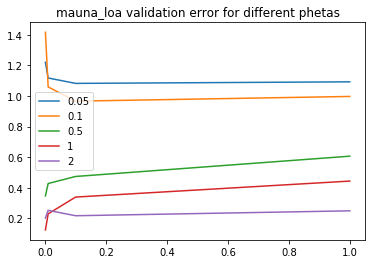

In [19]:
plt.plot(kvalues,val_error[0],kvalues,val_error[1],kvalues,val_error[2],kvalues,val_error[3],kvalues,val_error[4])
plt.legend(['0.05', '0.1', '0.5', '1', '2'])
plt.title('mauna_loa validation error for different phetas')
plt.show()
#min at k - 0.001, pheta = 1

In [20]:
print(val_error[3])
print(val_error[4])

[0.12447867031377788, 0.2294948423908652, 0.3391115051802565, 0.4436147618852472]
[0.20170528414768468, 0.2524042653635087, 0.21714466927432255, 0.24921984409731723]


In [21]:
x_all = np.vstack([x_train, x_valid])
y_all = np.vstack([y_train, y_valid])

n = len(x_all)
pheta = [0.05, 0.1, 0.5, 1, 2]
kvalues = [0.001, 0.01, 0.1, 1]
test_error = []
temp_error = []

for p in pheta:

    Gram = np.zeros([n,n])
    
    #I want to vectorize
    for i in range(n):
        for j in range(n):
            Gram[i][j] = gaussian_rbf(x_all[i],x_all[j],p)
            
#     print(Gram)
    
    #I want to vectorize
    kx = np.zeros([len(x_test),n])
    for i in range(len(x_test)):
        x = x_test[i]
        for j in range(n):
            kx[i][j] = gaussian_rbf(x,x_all[j],p)

    temp_error = []
    for k in kvalues:

        R = np.linalg.cholesky((Gram + k*np.identity(n)))

        # want the inverse of (R R.T)^-1

        Rinv = np.linalg.inv(R)

        alpha = np.dot(Rinv.T, Rinv)
        alpha = np.dot(alpha,y_all)



        y_test_predicted = np.dot(kx,alpha)

        error = RMSE(y_test,y_test_predicted)

        temp_error.append(error) 
        
    test_error.append(temp_error)



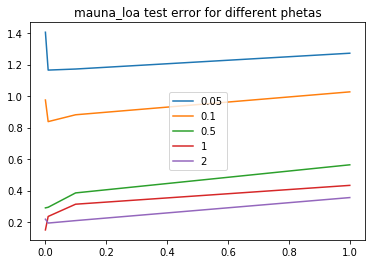

In [22]:
plt.plot(kvalues,test_error[0],kvalues,test_error[1],kvalues,test_error[2],kvalues,test_error[3],kvalues,test_error[4])
plt.legend(['0.05', '0.1', '0.5', '1', '2'])
plt.title('mauna_loa test error for different phetas')
plt.show()


In [23]:
print(test_error[3])

[0.14977338771821658, 0.2352828331610978, 0.31307251275631914, 0.43273555285699256]


In [24]:
print(test_error[4])

[0.2177883712566928, 0.19330637597489436, 0.2088717823561566, 0.3552183576304214]
